# 1 : Librairies et Options

In [1]:
import pandas as pd
import re
import numpy as np
from PIL import Image
from wordcloud import WordCloud
from matplotlib.colors import ListedColormap

import seaborn as sns
import matplotlib.pyplot as plt

from pymongo import MongoClient

import nltk
nltk.download('popular', quiet = True)
import spacy

# 2 : Ouverture du fichier et info générales

In [2]:
Champignons = pd.read_csv('ChampignonsExtract.csv')
Champignons.head(2)

,Nom,Comestibilite,FormeChapeau,LamePore,LamePoreInfo,Pied,Chair,Odeur,Saveur,Habitat,Saison,Photos
0,AGARIC AUGUSTE,À rejeter,"5 à 25 cm, couvert de mèches brun-roux sur fo...",LAMES,"Libres, crème puis gris-rose et enfin brunes.","Blanc, élancé (6 à 20 cm), légèrement en mass...","Blanche, jaunissant lentement à la coupe, ros...","Agréable, d’amande amère",Douce,"Bois clairs de feuillus ou de conifères, lisi...",Juillet > Octobre,Agaricauguste.jpg
1,AGARIC DES JACHÈRES,Excellent comestible,"5 à 15 cm, lisse, blanc puis jaunissant en vi...",LAMES,"Libres, serrées, gris-rose très pâle puis bru...","5 à 15 cm, élancé, avec un large anneau blanc...","Blanche, ferme",Anisée,Douce,"Surtout sous feuillus, clairières, lisières, ...",Juin > Novembre,Agaricdesjachères.jpg


In [3]:
Champignons.tail(2)

,Nom,Comestibilite,FormeChapeau,LamePore,LamePoreInfo,Pied,Chair,Odeur,Saveur,Habitat,Saison,Photos
217,VESSE-DE-LOUP PERLÉE,Comestible jeune,Boule blanche (2 à 7 cm) recouverte de fins a...,Aucun,Aucun,"Long, de 1 à 4 cm, bien formé","Cotonneuse, blanche puis olivâtre et pulvérul...",Faible,Douce,Forêts de feuillus et de conifères,Mai > Novembre,Vesse-de-loupperlée.jpg
218,VOLVAIRE VISQUEUSE,Comestible médiocre,"5 à 15 cm, lisse, très visqueux puis brillant...",LAMES,"Libres, serrées, blanches puis roses","5 à 20 cm, blanc, élargi à la base avec une l...",Blanche,"Faible, de radis ou de pomme de terre crue",Douce,"Champs, pâturages, au bord des routes",Avril > Novembre,Volvairevisqueuse.jpg


In [4]:
Champignons.sample(2)

,Nom,Comestibilite,FormeChapeau,LamePore,LamePoreInfo,Pied,Chair,Odeur,Saveur,Habitat,Saison,Photos
132,LACTAIRE DES ÉPICÉAS,À rejeter,"6 à 15 cm, lisse, un peu visqueux, creusé au ...",LAMES,"Un peu décurrentes, orangé vif à saumonées, p...","3 à 7 cm, orangé, uniforme, souvent cerné de ...","Orangée à saumonée, cassante. Lait orange car...",Fruitée ou de carotte,"Peu agréable, un peu piquante ou amère",Uniquement sous les épicéas,Septembre > Novembre,Lactairedesépicéas.jpg
26,BOLET CRAQUELÉ,Comestible médiocre,"4 à 15 cm, velouté, mat, jaune, brun-jaune ou...",PORES,"Fins, beige-jaunâtre à jaune vif, brunissant ...","5 à 12 cm, épais, plus fin à la base, jaune, ...","Blanchâtre, devenant rose-rougeâtre à la coup...",Faible,Douce,"Forêts de feuillus, surtout sous chênes et hê...",Juin > Octobre,Boletcraquelé.jpg


In [5]:
# Taille de la DF : 
Champignons.shape

(219, 12)

In [6]:
# Infos générales :
Champignons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Nom            219 non-null    object
 1   Comestibilite  218 non-null    object
 2   FormeChapeau   219 non-null    object
 3   LamePore       219 non-null    object
 4   LamePoreInfo   219 non-null    object
 5   Pied           219 non-null    object
 6   Chair          219 non-null    object
 7   Odeur          219 non-null    object
 8   Saveur         219 non-null    object
 9   Habitat        219 non-null    object
 10  Saison         219 non-null    object
 11  Photos         219 non-null    object
dtypes: object(12)
memory usage: 20.7+ KB


In [7]:
# Présence de NaNs :
Champignons.isna().sum().sum()

1

**Il manque une donnée dans Comestibilité**

# 3 : Analyse des différentes colonnes et extractions des informations

## 3.1 : Colonne Comestibilité

In [8]:
Champignons['Comestibilite'].value_counts(dropna = False)

Comestibilite
À rejeter                72
Bon comestible           42
Toxique                  33
Excellent comestible     18
Comestible médiocre      17
Comestible               10
  Mortel                  9
Très bon comestible       6
Comestible jeune          5
Comestible bien cuit      2
NaN                       1
Bon comestible jeune      1
Bon comestibilité         1
CHAPEAU                   1
Comestible très jeune     1
Name: count, dtype: int64

In [9]:
# Analyse du NaN :
Champignons[Champignons['Comestibilite'].isna()]

,Nom,Comestibilite,FormeChapeau,LamePore,LamePoreInfo,Pied,Chair,Odeur,Saveur,Habitat,Saison,Photos
16,ARMILLAIRE COULEUR DE MIEL,NaN,"3 à 15 cm, jaune à ocre, voire miel, plus fon...",LAMES,"Un peu décurrentes, crème à jaunâtres, se tac...","5 à 20 cm, beige jaunâtre à ocre brun, avec u...",Blanche,"Faible, peu agréable",Douce,"Sur le bois de feuillus morts ou vivants, en ...",Septembre> Novembre,Armillairecouleurdemiel.jpg


**Sur le site il manque l'informations que je pourrai récupérer à la fin du lien de la photo mais autant l'éliminer ou remplacer le mot manquant.**

In [10]:
# Remplacer les NaNs de la colonne Comestibilité :
Champignons['Comestibilite'].fillna('Champignon à rejeter', inplace = True)

In [11]:
# Analyse du mots CHAPEAU :
Champignons[Champignons['Comestibilite'] == 'CHAPEAU']

,Nom,Comestibilite,FormeChapeau,LamePore,LamePoreInfo,Pied,Chair,Odeur,Saveur,Habitat,Saison,Photos
108,HÉBÉLOME CROÛTE-DE-PAIN,CHAPEAU,"4 à 10 cm, charnu, visqueux, lisse, blanchâtr...",LAMES,"Échancrées, serrées, crème à brun rosé pâle, ...","3 à 10 cm, blanchâtre, finement floconneux, s...",Non Définie,"Forte, de radis",Douce ou un peu amère,Forêts de feuillus et de conifères,Août > Octobre,Hébélomecroûte-de-pain.jpg


**Sur le site, pour ce champignon la comestibilité de celui-ci n'est pas au même endroit que pour les autres.**

In [12]:
# Remplacer le mot CHAPEAU par sa comestibilité :
Champignons['Comestibilite'].replace('CHAPEAU', 'Toxique', inplace = True)

In [13]:
# Le mot Mortel contient des espaces :
Champignons['Comestibilite'] = Champignons['Comestibilite'].apply(lambda x: x.strip())

In [14]:
# Pour faire une classification certaines catégories n'ont pas sufisamment de données.
# Simplifications des catégories même si un bon cueilleur de champignon préférera les excellent ou bon comestible :

Champignons.loc[Champignons.Comestibilite == "Bon comestible", "Comestibilite"] = "Comestible"
Champignons.loc[Champignons.Comestibilite == "Excellent comestible", "Comestibilite"] = "Comestible"
Champignons.loc[Champignons.Comestibilite == "Comestible médiocre", "Comestibilite"] = "Comestible"
Champignons.loc[Champignons.Comestibilite == "Très bon comestible", "Comestibilite"] = "Comestible"
Champignons.loc[Champignons.Comestibilite == "Bon comestibilité", "Comestibilite"] = "Comestible"
Champignons.loc[Champignons.Comestibilite == "Comestible jeune", "Comestibilite"] = "Comestible"
Champignons.loc[Champignons.Comestibilite == "Comestible bien cuit", "Comestibilite"] = "Comestible"
Champignons.loc[Champignons.Comestibilite == "Bon comestible jeune", "Comestibilite"] = "Comestible"
Champignons.loc[Champignons.Comestibilite == "Comestible très jeune", "Comestibilite"] = "Comestible"

Champignons.loc[Champignons.Comestibilite == "Champignon à rejeter", "Comestibilite"] = "À rejeter"

# Groupes après transformation :
Champignons['Comestibilite'].value_counts(dropna = False)


Comestibilite
Comestible    103
À rejeter      73
Toxique        34
Mortel          9
Name: count, dtype: int64

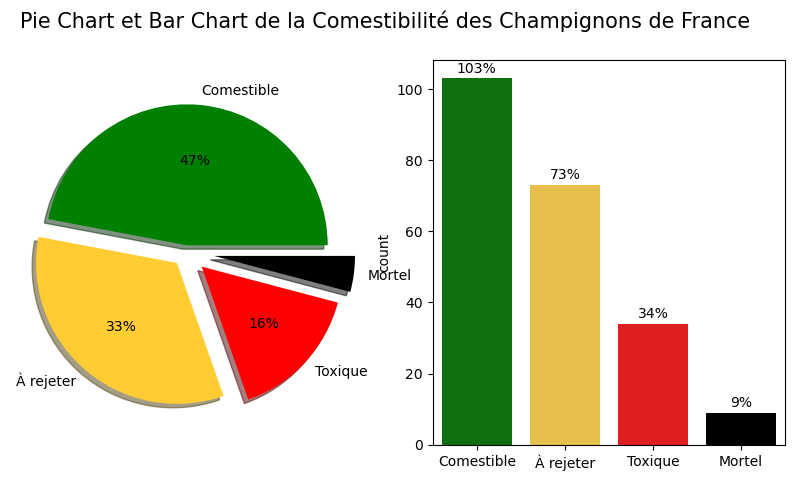

In [15]:
# Quelques graphiques :

# DF de comestibilité :
Comestibilite = Champignons['Comestibilite'].value_counts(dropna = False).to_frame().reset_index()

# Palette des couleurs :
colors = ['Green', '#FFCC33', 'Red', 'black']

# Création des subplots :
plt.subplots(1,2, figsize =(10,5))

# Pie Chart :
explode = [0.05, 0.1, 0.15, 0.2] 

plt.subplot(121)
plt.pie(Comestibilite['count'], labels = Comestibilite['Comestibilite'], colors = colors, autopct='%.0f%%', shadow=True, explode=explode)

# Bar Plot :
plt.subplot(122)
ax = sns.barplot(Comestibilite, x="Comestibilite", y="count", palette = colors)
ax.bar_label(ax.containers[0], padding=2, labels = [str(i)+'%' for i in list(Comestibilite['count'])])
ax = plt.xlabel('')

plt.suptitle('Pie Chart et Bar Chart de la Comestibilité des Champignons de France', fontsize=15)
plt.show()

## 3.2 : FormeChapeau

**En plus de la taille des chapeaux il y a diverses informations sur la forme et la couleur.**

In [16]:
# Définition d'extraction des tailles via regex :
def goodsize (string) :
    try : 
        numbers = re.findall('\d+,\d+|\d+', string) # récupére les chiffres avec et sans virgules
        numbers = [i.replace(',','.') for i in numbers] # sinon ce n'est pas des floats
        numbers = [float(i) for i in numbers]

        return min(numbers), max(numbers)
    
    except :
        return 0, 0 # Il y a un champignon sans taille de chapeau

In [17]:
# Création de colonnes pour la taille des chapeaux :
Champignons.insert(3, "TailleChapeauMin", 0, allow_duplicates=False)
Champignons.insert(4, "TailleChapeauMax", 0, allow_duplicates=False)
Champignons['TailleChapeauMin'] = Champignons['FormeChapeau'].apply(lambda x : goodsize(x)[0])
Champignons['TailleChapeauMax'] = Champignons['FormeChapeau'].apply(lambda x : goodsize(x)[1])

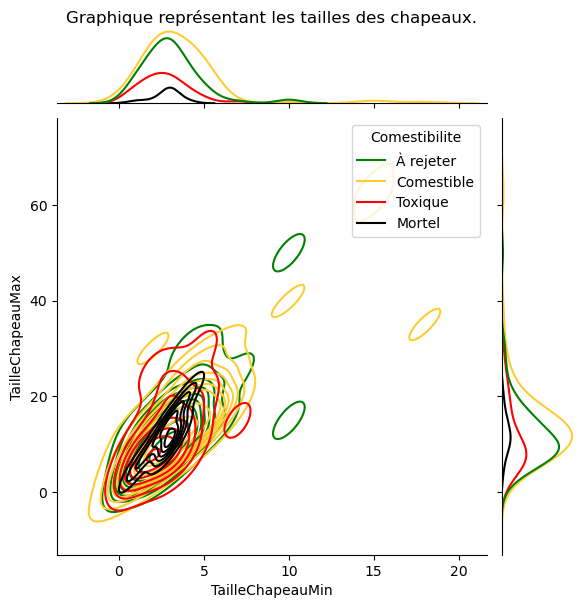

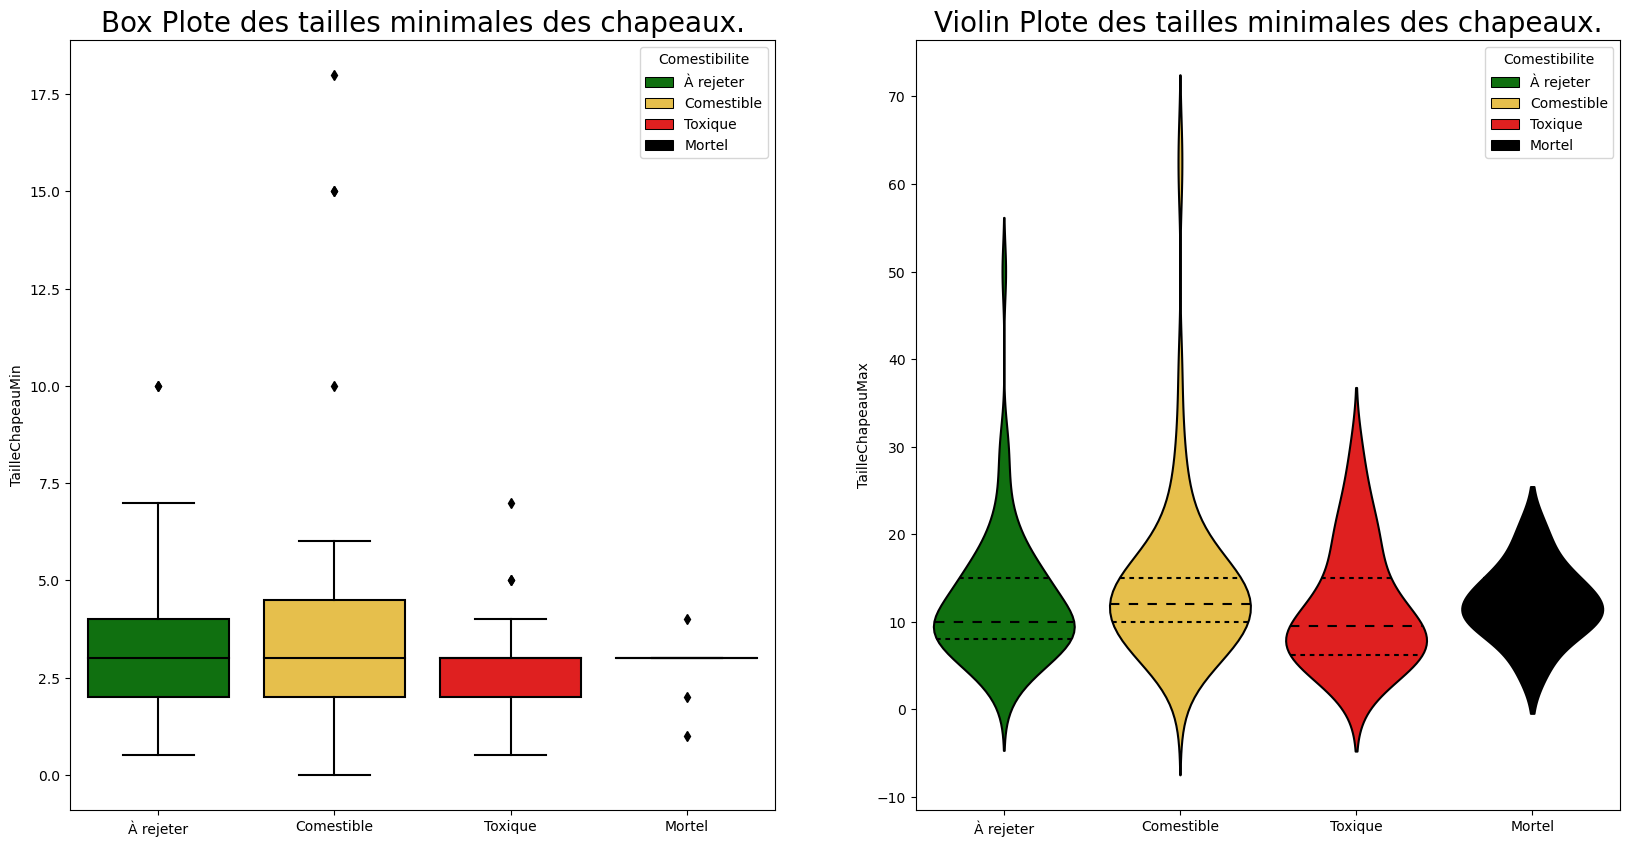

In [18]:
# Graphiques :
sns.jointplot(data=Champignons, x="TailleChapeauMin", y="TailleChapeauMax", hue="Comestibilite", kind="kde", palette = colors)
plt.title('Graphique représentant les tailles des chapeaux.', x=0.5, y=1.2)
plt.show()

fig, axes = plt.subplots(1,2,figsize =(20,10))
sns.boxplot(ax=axes[0], data=Champignons, y="TailleChapeauMin", x="Comestibilite", hue="Comestibilite", palette = colors, dodge=False)
axes[0].set_title('Box Plote des tailles minimales des chapeaux.', size = 20)
axes[0].set_xlabel('')

sns.violinplot(ax=axes[1], data=Champignons, y="TailleChapeauMax", x="Comestibilite", hue="Comestibilite", palette = colors, inner="quart", fill=False, dodge=False)
axes[1].set_title('Violin Plote des tailles minimales des chapeaux.', size = 20)
axes[1].set_xlabel('')
plt.show()

**On remarque que les champignons mortels sont plus petits.**
**Quelques outliers dans toutes les catégories.**

## 3.3 : Lames ou pores

In [19]:
Champignons['LamePore'].value_counts(dropna = False)

LamePore
LAMES     140
Aucun      46
PORES      33
Name: count, dtype: int64

In [20]:
Champignons['LamePoreInfo'].head(5)

0        Libres, crème puis gris-rose et enfin brunes.
1     Libres, serrées, gris-rose très pâle puis bru...
2          Libres, serrées, gris-rose pâle puis brunes
3     Libres, blanc rosâtre puis roses et enfin bru...
4                 Libres, blanches à jaune citron pâle
Name: LamePoreInfo, dtype: object

**Informations diverses sur les lames ou les pores des champignons (couleurs).**

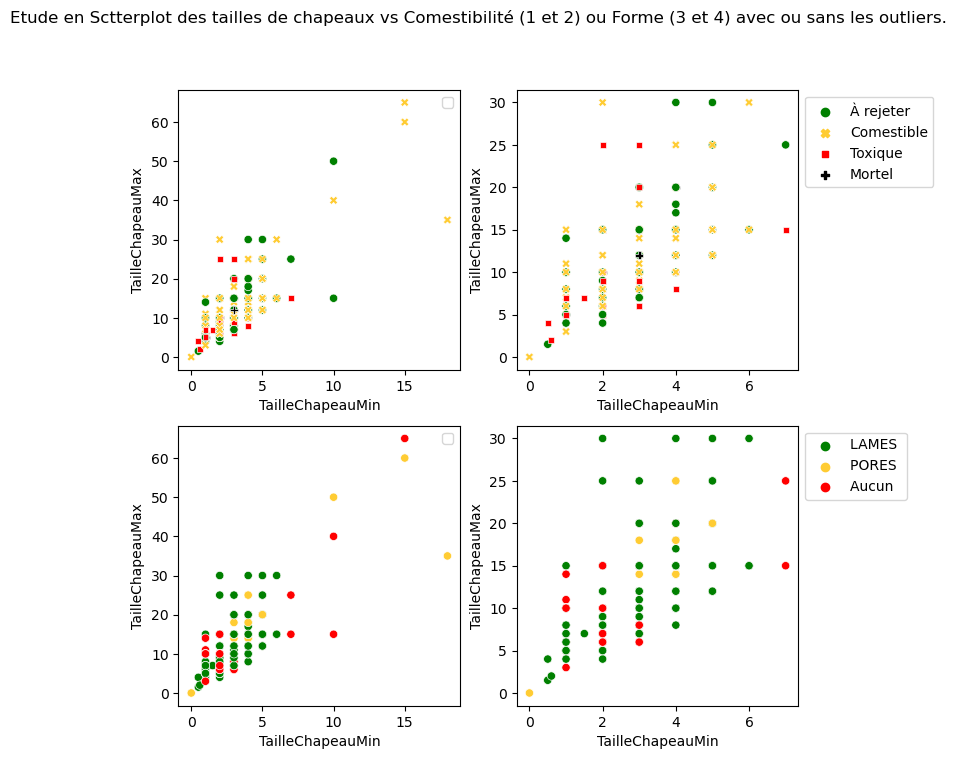

In [21]:
# Création d'une DF sans les outliers des chapeaux :
DataWTO = Champignons[(Champignons['TailleChapeauMin'] <=8) & (Champignons['TailleChapeauMax'] <= 40)]

plt.subplots(2,2, figsize = (8,8))
plt.suptitle('Etude en Sctterplot des tailles de chapeaux vs Comestibilité (1 et 2) ou Forme (3 et 4) avec ou sans les outliers.')

# Graphiques :
plt.subplot(221)
sns.scatterplot(data=Champignons, x="TailleChapeauMin",  y="TailleChapeauMax", hue="Comestibilite", palette = colors, style = 'Comestibilite')
plt.legend('')

plt.subplot(222)
sns.scatterplot(data=DataWTO, x="TailleChapeauMin",  y="TailleChapeauMax", hue="Comestibilite", palette = colors, style = 'Comestibilite')
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))

plt.subplot(223)
sns.scatterplot(data=Champignons, x="TailleChapeauMin",  y="TailleChapeauMax", hue="LamePore", palette = colors[:3])
plt.legend('')

plt.subplot(224)
sns.scatterplot(data=DataWTO, x="TailleChapeauMin",  y="TailleChapeauMax", hue="LamePore", palette = colors[:3])
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

In [22]:
# Tableau croisé :
(pd.crosstab(Champignons['Comestibilite'], Champignons['LamePore'], normalize = 'index')*100).astype(int)

LamePore,Aucun,LAMES,PORES
Comestibilite,,,
Comestible,27,51,21
Mortel,0,100,0
Toxique,14,76,8
À rejeter,17,71,10


In [23]:
# Tableau croisé :
(pd.crosstab(Champignons['Comestibilite'], Champignons['LamePore'], normalize = 'columns')*100).astype(int)

LamePore,Aucun,LAMES,PORES
Comestibilite,,,
Comestible,60,37,66
Mortel,0,6,0
Toxique,10,18,9
À rejeter,28,37,24


In [24]:
# Tableau croisé :
(pd.crosstab(Champignons['Comestibilite'], Champignons['LamePore'], normalize = True)*100).astype(int)

LamePore,Aucun,LAMES,PORES
Comestibilite,,,
Comestible,12,24,10
Mortel,0,4,0
Toxique,2,11,1
À rejeter,5,23,3


**On remarque que tous les champignons mortels ont des lames.**
**Qu'il y a plus de champignons avec des lames.**

**Que à nombre de champignon équivalent pour chaque espéces :**
- **on à 46% de chance de tomber sur un bon champignon.**
- **on à 4% de chance de tomber sur un champignon mortel.**
- **on à 18% de chance d'être intoxiqué ou mort avec ces champignons.**

## 3.4 : Pieds

**En plus de la taille des pieds il y a diverses informations sur la couleur et la forme (à extraire en NLP).**

In [25]:
# Création de colonnes pour la taille des pieds :
Champignons.insert(7, "TaillePiedMin", 0, allow_duplicates=False)
Champignons.insert(8, "TaillePiedMax", 0, allow_duplicates=False)
Champignons['TaillePiedMin'] = Champignons['Pied'].apply(lambda x : goodsize(x)[0])
Champignons['TaillePiedMax'] = Champignons['Pied'].apply(lambda x : goodsize(x)[1])

In [26]:
Champignons['Pied']

0       Blanc, élancé (6 à 20 cm), légèrement en mass...
1       5 à 15 cm, élancé, avec un large anneau blanc...
2       3 à 15 cm, avec un bulbe net et un anneau flo...
3       Blanc, en massue ou bulbeux, 2 à 15 cm, avec ...
4       3 à 15 cm, jaunâtre, avec un anneau mince et ...
                             ...                        
214                        Long, bien formé, de 1 à 3 cm
215                                               Absent
216     Court (0,5 à 2 cm), beige-ocre, couvert d’aig...
217                        Long, de 1 à 4 cm, bien formé
218     5 à 20 cm, blanc, élargi à la base avec une l...
Name: Pied, Length: 219, dtype: object

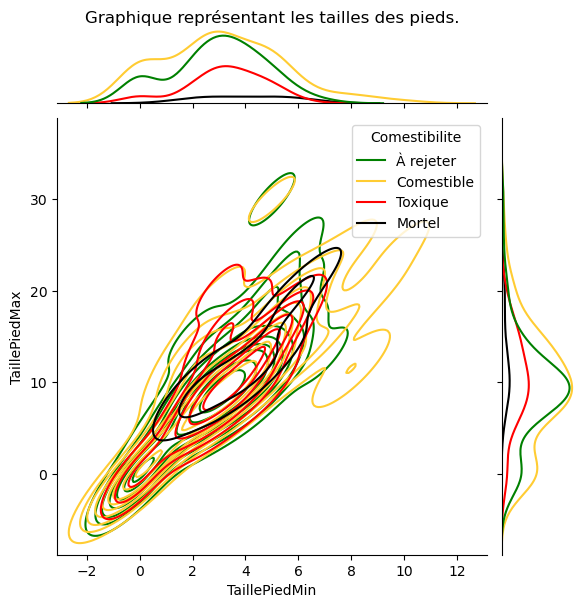

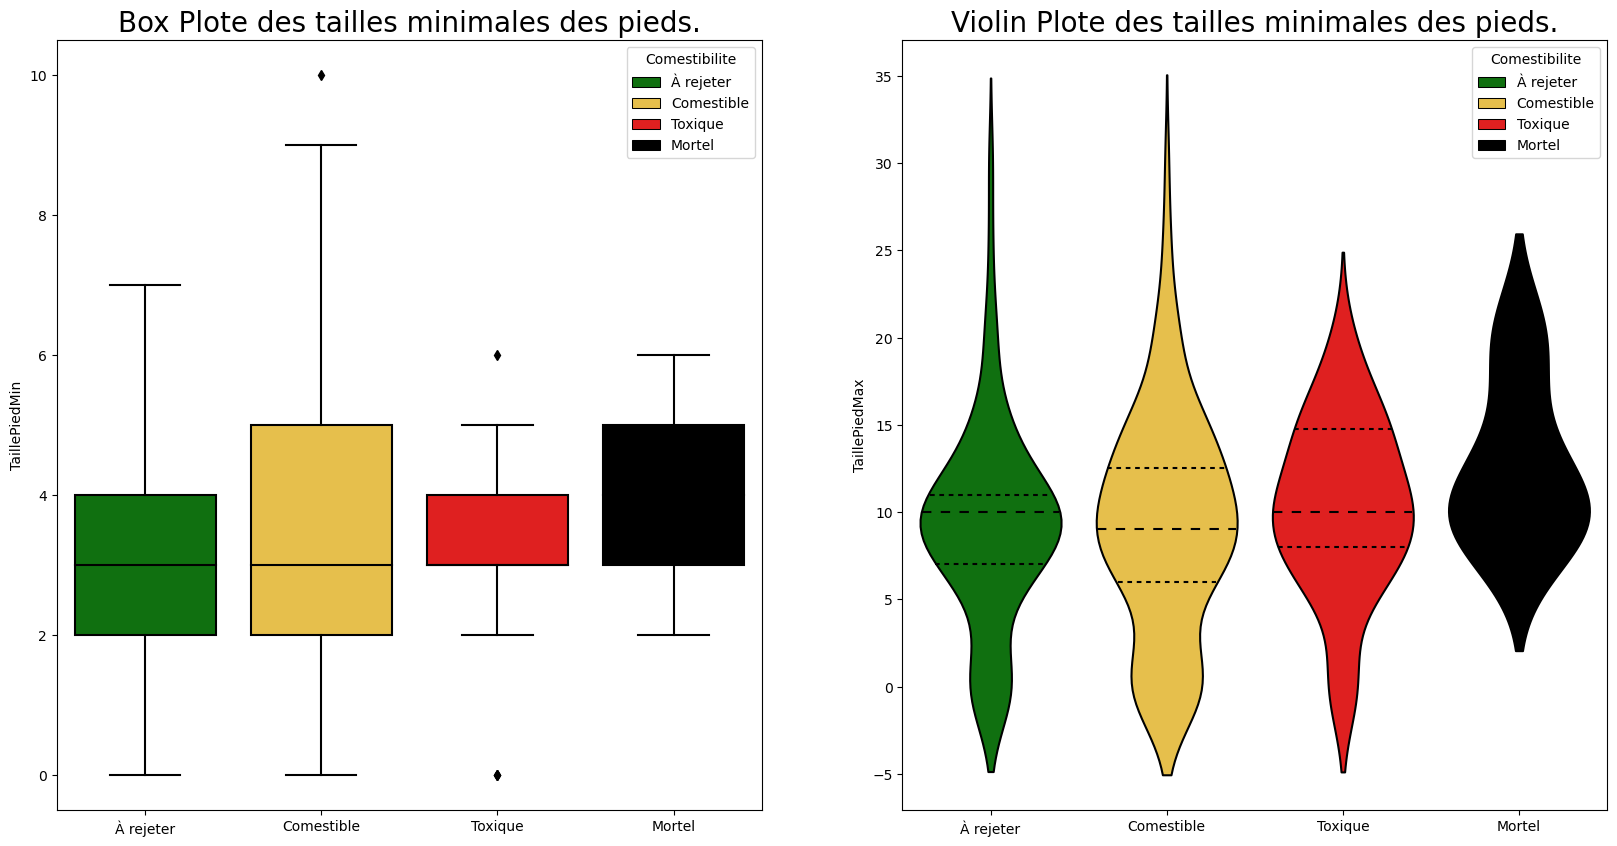

In [27]:
# Graphiques :
sns.jointplot(data=Champignons, x="TaillePiedMin", y="TaillePiedMax", hue="Comestibilite", kind="kde", palette = colors)
plt.title('Graphique représentant les tailles des pieds.', x=0.5, y=1.2)
plt.show()

fig, axes = plt.subplots(1,2,figsize =(20,10))
sns.boxplot(ax=axes[0], data=Champignons, y="TaillePiedMin", x="Comestibilite", hue="Comestibilite", palette = colors, dodge=False)
axes[0].set_title('Box Plote des tailles minimales des pieds.', size = 20)
axes[0].set_xlabel('')

sns.violinplot(ax=axes[1], data=Champignons, y="TaillePiedMax", x="Comestibilite", hue="Comestibilite", palette = colors, inner="quart", fill=False, dodge=False)
axes[1].set_title('Violin Plote des tailles minimales des pieds.', size = 20)
axes[1].set_xlabel('')
plt.show()

**Moins de disparités sur les tailles des pieds et moins d'outliers.**

## 3.5 : Chair

In [28]:
Champignons['Chair'].head(5)

0     Blanche, jaunissant lentement à la coupe, ros...
1                                       Blanche, ferme
2      Blanche, jaunissant fortement à la base du pied
3                                       Blanche, ferme
4                          Blanche à jaune citron pâle
Name: Chair, dtype: object

**Diverses informations sur la courleur et la texture de la chair du champignon.**

## 3.6 : Odeur

In [29]:
Champignons['Odeur'].value_counts()

Odeur
 Faible                                            76
 Farineuse                                          6
 Faible, agréable                                   5
 Agréable, de champignon                            5
 Agréable, fruitée                                  4
                                                   ..
 Faible, de vinaigre en froissant le chapeau.       1
 Faible, de rance                                   1
 Forte, désagréable, de poulailler ou farineuse     1
 De petit pois cru                                  1
 Faible, de radis ou de pomme de terre crue         1
Name: count, Length: 102, dtype: int64

**Odeur du champignon, un peu trop de diversité pour en faire des catégories.**

In [30]:
Champignons['Odeur'] = Champignons['Odeur'].apply(lambda x : x.strip())

## 3.7 : saveur

In [31]:
Champignons['Saveur'].value_counts()

Saveur
 Douce                                                                      150
 Non Définie                                                                  7
 Amère                                                                        6
 Très piquante                                                                6
 Farineuse                                                                    5
 Douce, de noisette                                                           3
 Douce, puis amère                                                            2
 Douce, de radis                                                              2
 Piquante                                                                     2
 Douce ou un peu amère                                                        2
 Douce, farineuse                                                             2
 Sans particularité                                                           2
 Un peu amère                    

**Saveur du champignon, un peu trop de diversité pour en faire des catégories.**

In [32]:
Champignons['Saveur'] = Champignons['Saveur'].apply(lambda x : x.strip())

## 3.8 : Habitat

In [33]:
Champignons['Habitat'].head()

0     Bois clairs de feuillus ou de conifères, lisi...
1     Surtout sous feuillus, clairières, lisières, ...
2                     Prairies, jardins ou bois clairs
3                     Bois clairs, surtout de feuillus
4                   Forêts de feuillus et de conifères
Name: Habitat, dtype: object

**Habitats du champignon, un peu trop de diversité pour en faire des catégories.**

## 3.9 : Saison

In [34]:
def GrowthMush(string):
    if string == ' Toute l’année' :
        return [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
    
    else :
        S = string.replace('>',' ').split(' ') # Remplacement de > par un espace car des fois il n'y a pas d'espace apré le >.
        Mois = []

        Conversion = {'Janvier' : [1], 'Février' : [2], 'Mars' : [3], 'Avril' : [4], 'Mai' : [5], 'Juin' : [6], 'Juillet' : [7], 
                     'Août' : [8], 'Septembre' : [9], 'Octobre' : [10], 'Novembre': [11], 'Décembre' : [12], 'Printemps' : [4,5,6], 
                      'Été' : [7,8,9], 'Automne' : [10,11,12], 'Hiver' : [1,2,3]}

        for key, value in Conversion.items() : # Récupération des différentes valeurs en fonctions des mois ou des saisons
            for s in S :
                if s.lower() == key.lower() :
                    Mois.append(value)

        Month = []
        for i in (Mois) : # Sortir de la structure de doubles listes (obligation due aux saisons)
            for j in i :
                Month.append(j)
        Mois = Month

        if len(Mois) == 2 and Mois == sorted(Mois) : # Récupération des mois entre les mois fournis. Une période dans l'ordre.
            minimum = min(Mois)
            mois = minimum
            maximum = max(Mois)
            while mois < maximum-1 :
                mois+=1
                Mois.append(mois)
            return sorted(Mois)

        elif len(Mois) == 4 and Mois == sorted(Mois) : # Deux périodes mais dans l'ordre.
            minimum = min(Mois[:2])
            mois = minimum
            maximum = max(Mois[:2])
            while mois < maximum-1 :
                mois+=1
                Mois.append(mois)
            minimum = min(Mois[2:4])
            mois = minimum
            maximum = max(Mois[2:4])
            while mois < maximum-1 :
                mois+=1
                Mois.append(mois)
            return sorted(Mois)

        elif Mois == sorted(Mois) or len(Mois) != 2 : # Dans l'ordre ou Deux saisons.
            return sorted(Mois)
        
        elif Mois != sorted(Mois) and len(Mois) == 2 : # Deux périodes dans le désordre
            M = Mois
            Mois = sorted(Mois)
            minimum = min(Mois)
            mois = minimum
            maximum = max(Mois)
            while mois < maximum-1 :
                mois+=1
                Mois.append(mois)
                
            Annee = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
            for m in Mois :
                del Annee[Annee.index(m)]
            
            for a in Annee :
                M.append(a)
                    
            return sorted(M)

In [35]:
# Utilisation de la définition :
Champignons['Saison'] = Champignons['Saison'].apply(GrowthMush)

In [36]:
# Création d'une définition permettant d'avoir la présence ou non des champignons pour les mois de l'année :
def presentoupas(liste) :

    Mois = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
    Global = []

    for m in Mois :
        if m in liste :
            Global.append(1)
        else :
            Global.append(0)

    return ','.join([str(x) for x in Global])       

In [37]:
# Utilisation de la définition :
Champignons['Saison'] = Champignons['Saison'].apply(presentoupas)

In [38]:
# Explostion de la colonne Saison en colonnes mois de l'année :
Champignons[['Janvier', 'Fevrier', 'Mars', 'Avril', 'Mai', 'Juin', 'Juillet', 'Aout', 'Septembre', 'Octobre', 'Novembre', 'Decembre']] = Champignons['Saison'].str.split(',', expand=True)

# Retour aux INT :
Champignons[['Janvier', 'Fevrier', 'Mars', 'Avril', 'Mai', 'Juin', 'Juillet', 'Aout', 'Septembre', 'Octobre', 'Novembre', 'Decembre']] = Champignons[['Janvier', 'Fevrier', 'Mars', 'Avril', 'Mai', 'Juin', 'Juillet', 'Aout', 'Septembre', 'Octobre', 'Novembre', 'Decembre']].astype(int)

## 3.10 : Extraction de tous les textes en une seule colonne pour NLP :

### 3.10.1 : Création d'une colonne avec tous les textes

In [39]:
# Colonnes de la DF :
Champignons.columns

Index(['Nom', 'Comestibilite', 'FormeChapeau', 'TailleChapeauMin',
       'TailleChapeauMax', 'LamePore', 'LamePoreInfo', 'TaillePiedMin',
       'TaillePiedMax', 'Pied', 'Chair', 'Odeur', 'Saveur', 'Habitat',
       'Saison', 'Photos', 'Janvier', 'Fevrier', 'Mars', 'Avril', 'Mai',
       'Juin', 'Juillet', 'Aout', 'Septembre', 'Octobre', 'Novembre',
       'Decembre'],
      dtype='object')

In [40]:
# Addition des colonnes informatives :
Champignons['InfosGenerales'] = Champignons['FormeChapeau'] +' '+ Champignons['LamePoreInfo'] +' '+ Champignons['Pied'] +' '+ Champignons['Chair'] +' '+ Champignons['Odeur'] +' '+ Champignons['Saveur'] +' '+ Champignons['Habitat']

In [41]:
# Suppression des colonnes inutiles :
Champignons = Champignons.drop(columns = ['FormeChapeau', 'LamePoreInfo', 'Pied', 'Chair', 'Odeur', 'Saveur', 'Habitat',
       'Saison'])

### 3.10.2 : Simplication de la colonne InfosGenerales

In [42]:
# Tokenisation + mise en minuscule :
def tokenizer(value):
    value = value.lower()
    value = nltk.word_tokenize(value)
    return value

Champignons['InfosGenerales'] = Champignons['InfosGenerales'].apply(tokenizer)
Champignons['InfosGenerales'].head(3)

0    [5, à, 25, cm, ,, couvert, de, mèches, brun-ro...
1    [5, à, 15, cm, ,, lisse, ,, blanc, puis, jauni...
2    [2, à, 15, cm, ,, blanc, à, grisâtre, pâle, ,,...
Name: InfosGenerales, dtype: object

In [43]:
# Suppression des stops words (en anglais) et des ponctuations :
def tokensWithoutStopWords(phrase) :
    tokensWSW = []
    for words in phrase:
        if words not in nltk.corpus.stopwords.words("french"):
            tokensWSW.append(words)
    return tokensWSW

Champignons['InfosGenerales'] = Champignons['InfosGenerales'].apply(tokensWithoutStopWords)
Champignons['InfosGenerales'] = Champignons['InfosGenerales'].apply(lambda x : [word for word in x if word.isalpha()]) # Suppression des .,;()...
Champignons['InfosGenerales'].head(3)

0    [cm, couvert, mèches, fond, crème, jaunissant,...
1    [cm, lisse, blanc, puis, jaunissant, vieilliss...
2    [cm, blanc, grisâtre, pâle, lisse, souvent, ir...
Name: InfosGenerales, dtype: object

In [44]:
# Lemmatizing :
nlp = spacy.load('fr_core_news_sm')

def Lemma(tokens) :
    tokens = ' '.join(tokens)
    sent_tokens = nlp(tokens)
    return list(sent_tokens)

Champignons['InfosGenerales'] = Champignons['InfosGenerales'].apply(Lemma)
Champignons['InfosGenerales'].head(3)

0    [cm, couvert, mèches, fond, crème, jaunissant,...
1    [cm, lisse, blanc, puis, jaunissant, vieilliss...
2    [cm, blanc, grisâtre, pâle, lisse, souvent, ir...
Name: InfosGenerales, dtype: object

In [45]:
# Récupération de certains types de mots :

mots = []
autres = []

X = list(Champignons['InfosGenerales'][0])
for token in X :
    if token.pos_ != 'NOUN' and token.pos_ != 'CCONJ' and token.pos_ != 'DET':
        mots.append(token)
    else :
        autres.append(token)

- **Non gardé car compliqué de n'enlever que ce qu'on ne veut pas.**

In [46]:
# Remettre les mots restant en une seule phrase :
Champignons['InfosGenerales'] = Champignons['InfosGenerales'].apply(lambda x : ' '.join(str(v) for v in x))

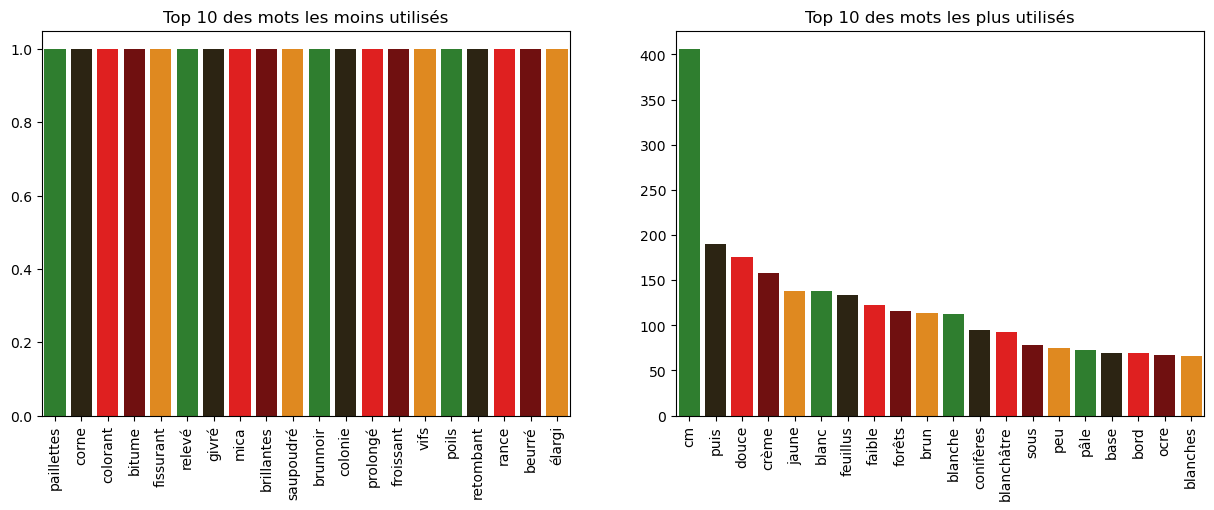

In [47]:
# Graphique des mots les plus utilisés dans toute la DF :
values = ' '.join(str(v) for v in Champignons['InfosGenerales'])
Freq = nltk.FreqDist(values.split((' ')))
Freq = pd.DataFrame.from_dict(Freq, orient='index').sort_values(0, ascending = False)
Freq = Freq.reset_index()

# Creation d'une palette Nature :
colors = ["forestgreen", "#30250F", "red", 'maroon', 'darkorange']

plt.subplots(1,2, figsize = (15,5))
plt.subplot(121)
sns.barplot(x = Freq['index'].tail(20), y = Freq[0].tail(20), palette = sns.color_palette(colors, 5))
plt.title('Top 10 des mots les moins utilisés')
plt.xticks(rotation = 90)
plt.xlabel('')
plt.ylabel('')

plt.subplot(122)
sns.barplot(x = Freq['index'].head(20), y = Freq[0].head(20), palette = sns.color_palette(colors, 5))
plt.title('Top 10 des mots les plus utilisés')
plt.xticks(rotation = 90)
plt.xlabel('')
plt.ylabel('')

plt.show()

**Sans surprise on retrouve le mot majoritaire est le mots cm**

In [48]:
# Supprimons le mot cm :
Champignons['InfosGenerales'] = Champignons['InfosGenerales'].apply(lambda x : x.replace('cm ', ''))

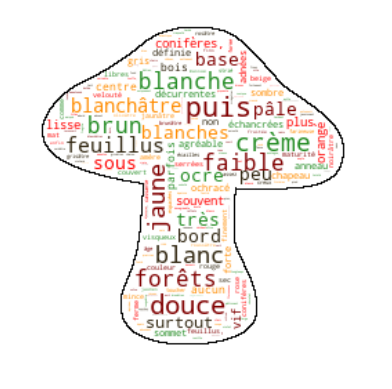

In [49]:
# Nuage de mots pour le fun :
mask = np.array(Image.open("Champignons.png"))
mask[mask == 1] = 255
cmap = ListedColormap(["forestgreen", "#30250F", "red", 'maroon', 'darkorange'])
wordcloud = WordCloud(colormap = cmap, width=480, height=480, max_font_size=20, min_font_size=1,background_color='white', mask = mask, contour_width = 0.2)

Mots = list(Champignons['InfosGenerales'])
Mots = ', '.join(Mots)
Mots = [m for m in Mots.split(' ')]

wordcloud.generate_from_frequencies(nltk.FreqDist(Mots))
plt.figure()

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

# 4 : Exporter et stocker les données

## 4.0 : Simplification de la colonne Comestibilité pour le ML

In [50]:
Champignons['Comestibilite'].value_counts()

Comestibilite
Comestible    103
À rejeter      73
Toxique        34
Mortel          9
Name: count, dtype: int64

- **Uniquement 9 champignons mortels ce qui complique la réalisation d'une classification, autant faire deux classes, une comestible et une non comestible.**

In [51]:
def comesnoncomes(value) :
    if value != 'Comestible' :
        return 'NonComestible'
    else :
        return value

In [52]:
Champignons['Comestibilite'] = Champignons['Comestibilite'].apply(comesnoncomes)

In [53]:
Champignons['Comestibilite'].value_counts()

Comestibilite
NonComestible    116
Comestible       103
Name: count, dtype: int64

## 4.1 : Exporter les données

In [54]:
# Exporter sous forme de csv ou excel :
Champignons.to_csv('ChampignonsDF.csv', index = False)
Champignons.to_excel('ChampignonsDF.xlsx', index = False)

## 4.2 : MongoDB Compass

### 4.2.1 : Stockage des données 

In [55]:
# Connection entre python et MongoDB Compass:
DEFAULT_CONNECTION_URL = "mongodb://localhost:27017/"
client = MongoClient(DEFAULT_CONNECTION_URL)

In [56]:
# Création de la liste pour implémentation dans MongoDB Compass:
ChampignonsFrançais = Champignons.to_dict('records')

In [57]:
# Nettoyage de la collection et ajout de la nouvelle extraction:
local_db = client.Scrapping # Scrapping = Nom de la BD

collection = local_db.ChampignonsFrançais # ChampignonsFrançais = Nom du fichier
collection.delete_many({})
res = collection.insert_many(ChampignonsFrançais)

### 4.2.2 : Ouverture des données

In [58]:
# Sélection de la collection :
collection = local_db.ChampignonsFrançais

# Création d'un filtre : 
filtre = {"Comestibilite": "Comestible"}

# Récupération des données :
documents = collection.find(filtre)

# Affichage des documents :
Data = pd.DataFrame(documents)
Data.head(3)

,_id,Nom,Comestibilite,TailleChapeauMin,TailleChapeauMax,LamePore,TaillePiedMin,TaillePiedMax,Photos,Janvier,...,Avril,Mai,Juin,Juillet,Aout,Septembre,Octobre,Novembre,Decembre,InfosGenerales
0,65e75fb661a82c36b8d4092a,AGARIC DES JACHÈRES,Comestible,5.0,15.0,LAMES,5.0,15.0,Agaricdesjachères.jpg,0,...,0,0,1,1,1,1,1,1,0,lisse blanc puis jaunissant vieillissant libre...
1,65e75fb661a82c36b8d4092c,AGARIC SYLVICOLE,Comestible,3.0,12.0,LAMES,2.0,15.0,Agaricsylvicole.jpg,0,...,0,0,0,0,1,1,1,0,0,blanc crème centre plus moins ocre lisse jauni...
2,65e75fb661a82c36b8d4092e,AMANITE ÉPAISSE,Comestible,3.0,15.0,LAMES,7.0,15.0,Amaniteépaisse.jpg,0,...,0,0,0,1,1,1,1,1,0,brun terne grosses plaques grisâtres libres bl...
